In [1]:
import  torch 
from    torch import nn, optim, autograd
import  numpy as np
#import  visdom
from    torch.nn import functional as F
from    matplotlib import pyplot as plt
import  random
import os
import torch.utils.data as Data

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#无氢原子内坐标数据读取
noh_data = np.loadtxt('../data/noh_trpcage_gzmat.csv',skiprows=1,delimiter=',',dtype=np.str)
noh_y = noh_data.astype(np.float)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
noh_y[1]

array([117.21  , 126.64  , 127.55  , 112.46  , 110.79  , 109.98  ,
       122.54  , 113.63  , 127.13  , 106.41  , 109.01  , 112.4   ,
       105.64  , 119.8   , 121.18  , 128.35  , 116.31  , 118.1   ,
       117.16  , 119.44  , 110.02  , 105.68  , 115.36  , 114.17  ,
       116.68  , 128.1   , 120.86  , 118.76  , 108.93  , 115.2   ,
       119.37  , 126.3   , 103.92  , 106.58  , 111.41  , 121.18  ,
       117.62  , 118.29  , 118.27  , 126.37  , 105.3   ,  99.89  ,
       120.77  , 110.11  , 119.06  , 118.79  , 113.75  , 124.41  ,
       104.51  , 106.07  , 123.09  , 112.54  , 120.8   , 116.62  ,
       125.35  , 110.15  , 107.37  , 105.74  , 108.04  , 121.57  ,
       119.49  , 119.68  , 118.07  , 121.18  , 104.03  , 118.07  ,
       120.78  , 119.41  , 117.58  , 119.87  , 119.4   , 119.04  ,
       112.53  , 120.37  , 121.79  , 130.32  , 110.89  , 114.51  ,
       118.35  , 113.08  , 114.56  , 110.99  , 121.21  , 113.49  ,
       125.47  , 107.69  , 109.39  , 109.15  , 113.58  , 124.1

In [160]:
noh_y[:,:152].shape
noh_y[:,152:303].shape
noh_y[:,303:].shape

(10000, 152)

In [4]:
#内坐标数据读取
nei_data = np.loadtxt('../data/trpcage_gzmat.csv',skiprows=1,delimiter=',',dtype=np.str)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [5]:
y = nei_data.astype(np.float)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [118]:
y1=y[:,:603]
y2=y[:,603:]

In [122]:
y1[0].shape

(603,)

In [2]:
#光谱数据读取
filePath = '../data'
def readname(filePath):
    name = os.listdir(filePath)
    return name

names = readname(filePath)
CD_Data = np.loadtxt('../data/01-10/S01/CD_DFT_results/001.010_sig-CD-DFT.txt')
UV_Data = np.loadtxt('../data/01-10/S01/UV_DFT_results/001.001_sig-UV-DFT.txt')
C_Data = np.loadtxt('../data/01-10/S01/pdb/001.061.pdb',usecols=(5,6,7))

for i in range(1,11):
    tempI=i-1
    for j in range(1,11):
        text ="../data/"+str(tempI)+'1-'+str(i)+"0/S"+str(tempI)+str(j)
        index=str(tempI)+str(j)
        if(j==10):
            text ="../data/"+str(tempI)+'1-'+str(i)+"0/S"+str(i)+"0"
            index=str(i)+"0"
        #tempData=np.loadtxt("../data/"+tempI+'1-'+i+"0/S"+tempI+i+"/001.001_sig-CD-DFT.txt")
        #print(index)
        for k in range(1,101):
            tempCDData=np.loadtxt(text+"/CD_DFT_results/0"+index+"."+"{:0>3d}".format(k)+"_sig-CD-DFT.txt")
            tempUVData=np.loadtxt(text+"/UV_DFT_results/0"+index+"."+"{:0>3d}".format(k)+"_sig-UV-DFT.txt")
            tempCData=np.loadtxt(text+"/pdb/0"+index+"."+"{:0>3d}".format(k)+".pdb",usecols=(5,6,7))
            CD_Data=np.append(CD_Data,tempCDData,axis=0)
            UV_Data=np.append(UV_Data,tempUVData,axis=0)
            C_Data=np.append(C_Data,tempCData,axis=0)

OSError: ../data/91-100/S100/CD_DFT_results/0100.001_sig-CD-DFT.txt not found.

In [5]:
#邻接矩阵加载
adj_Data = np.loadtxt('../data/2D/adjacentmatrix.csv',dtype=float,delimiter=',',encoding='utf-8')
adj_Data = torch.from_numpy(adj_Data).to(torch.float).cuda(2)


In [26]:
C_Data=torch.from_numpy(C_Data).to(torch.float).cuda(2)

TypeError: expected np.ndarray (got Tensor)

In [38]:
#对应的2跳邻接和3跳邻接,3跳邻接其实包含了1跳和2跳
angle_Data = torch.matmul(adj_Data, adj_Data)
angle_Data[angle_Data>0]=1
dihedral_Data = torch.matmul(angle_Data, adj_Data)

dihedral_Data[dihedral_Data>0]=1
mask3=dihedral_Data.to(torch.bool).reshape(1,304,304)
mask2=angle_Data.to(torch.bool).reshape(1,304,304)
mask1=adj_Data.to(torch.bool).reshape(1,304,304)

In [39]:
mask1=torch.triu(mask1,diagonal=1)
mask2=torch.triu(mask2,diagonal=1)
mask3=torch.triu(mask3,diagonal=1)

In [44]:
mask3[0]

tensor([[False,  True,  True,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False,  True,  True],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')

In [51]:
torch.nonzero(mask2[0]).shape

torch.Size([565, 2])

In [57]:
t=mask3.reshape(1,304,304)

d=C_Data.view(9901,304,3)
d1=torch.cdist(d,d,p=2)
dist=torch.masked_select(d1,t)
dist.reshape(9901,1147).max()

tensor(4.2111, device='cuda:0')

tensor(0.9586, device='cuda:0')

In [ ]:
dist=torch.masked_select(d,t)

In [109]:
testx=torch.from_numpy(C_Data[0:2000,302:603])
testy=torch.from_numpy(C_Data[7000:9000,302:603])

In [117]:
testx=torch.from_numpy(C_Data[0:2000,:302])
testy=torch.from_numpy(C_Data[7000:9000,:302])

In [114]:
testx=torch.from_numpy(C_Data[0:2000,603:])
testy=torch.from_numpy(C_Data[7000:9000,603:])

In [100]:
a = torch.tensor([[-1, 1, 1, 1],[-1, 1, 1, 1]])
b = torch.tensor([[3, 3, 3, 3],[-1, 1, 1, 1]])

In [115]:
coordinate_loss(testx,testy).mean()

tensor(0.0166, dtype=torch.float64)

In [118]:
dist_loss(testx,testy).mean()

tensor(3.7544, dtype=torch.float64)

In [7]:
CD_Data=CD_Data.reshape(9901,1,10417,2)
UV_Data=UV_Data.reshape(9901,1,10417,2)
C_Data=y[:9901]
print(CD_Data.reshape(9901,10417*2).shape)
print(UV_Data.shape)
print(C_Data.shape)
print(np.append(CD_Data,UV_Data,axis=1).shape)

(9901, 20834)
(9901, 1, 10417, 2)
(9901, 906)
(9901, 2, 10417, 2)


In [8]:
CD_data = np.loadtxt('../data/01-10/S01/CD_DFT_results/001.001_sig-CD-DFT.txt')
#UV_data = np.loadtxt('../data/91-100/S100/UV_DFT_results/001.001_sig-UV-DFT.txt')
C_data = C_Data[0]
#print(CD_data.shape)
#print(UV_data.shape)
print(C_data.shape)
raw_data=torch.from_numpy(C_data.reshape(906,))


(906,)


In [9]:
S_data=(np.append(CD_Data[0],UV_Data[0],axis=0))
raw_spectrum=torch.from_numpy(S_data).reshape(1,2, 10417, 2)


In [121]:
CD1_Data=CD_Data[:,:,:,1]
UV1_Data=UV_Data[:,:,:,1]

In [2]:
CD1_Data=np.loadtxt('cd.csv')
UV1_Data=np.loadtxt('uv.csv')

In [4]:
from pretreatment import Pretreatment as pre
from torch import Tensor

p=pre()
#对光谱进行预处理
def preprocess(X):
    sg = p.SG(X, 4*5+1,2*3,2).reshape(9901,1,10417)
    D1 = p.D1(X)
    D2 = p.D2(X)
    X=X.reshape(9901,1,10417)
    a=np.append(sg,X,axis=1)
    #b=np.append(a,D2,axis=1)
    #c=np.append(X,b,axis=1)
    return a,D1,D2

In [9]:
Xcd=CD1_Data.reshape(9901,10417)
new_cd,cd_d1,cd_d2=preprocess(X)

In [10]:
Xuv=UV1_Data.reshape(9901,10417)
new_cd,uv_d1,uv_d2=preprocess(X)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28436 (\N{CJK UNIFIED IDEOGRAPH-6F14}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


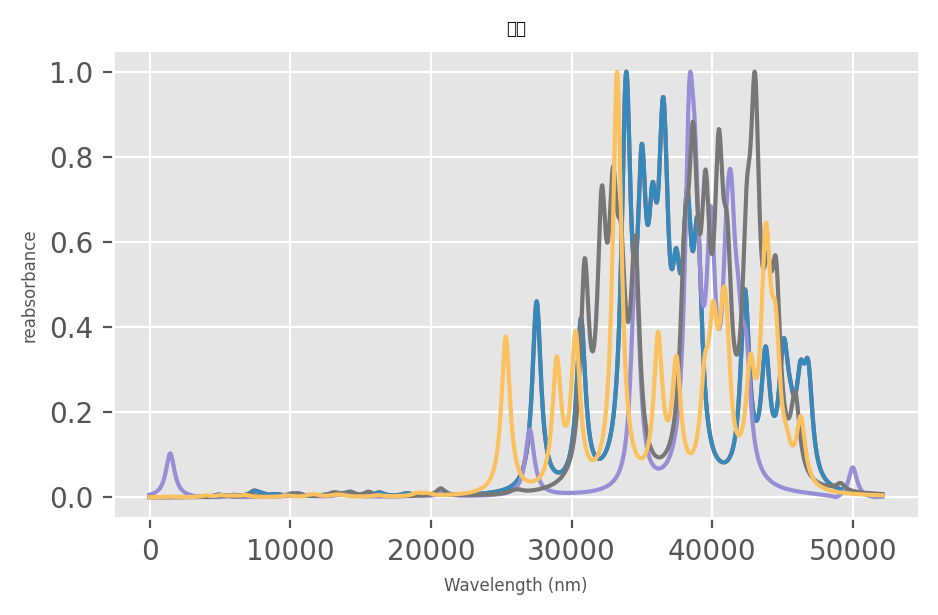

In [22]:
p.PlotSpectrum(Xuv[:5], '演示', 0, 5).show()

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28436 (\N{CJK UNIFIED IDEOGRAPH-6F14}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


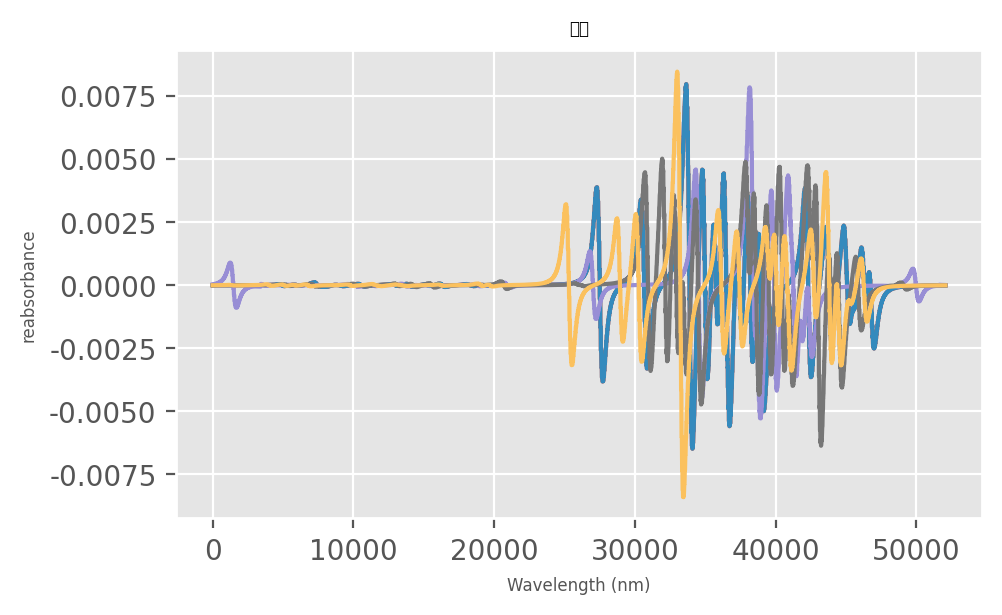

In [23]:
p.PlotSpectrum(uv_d1[:5], '演示', 0, 5).show()

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28436 (\N{CJK UNIFIED IDEOGRAPH-6F14}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


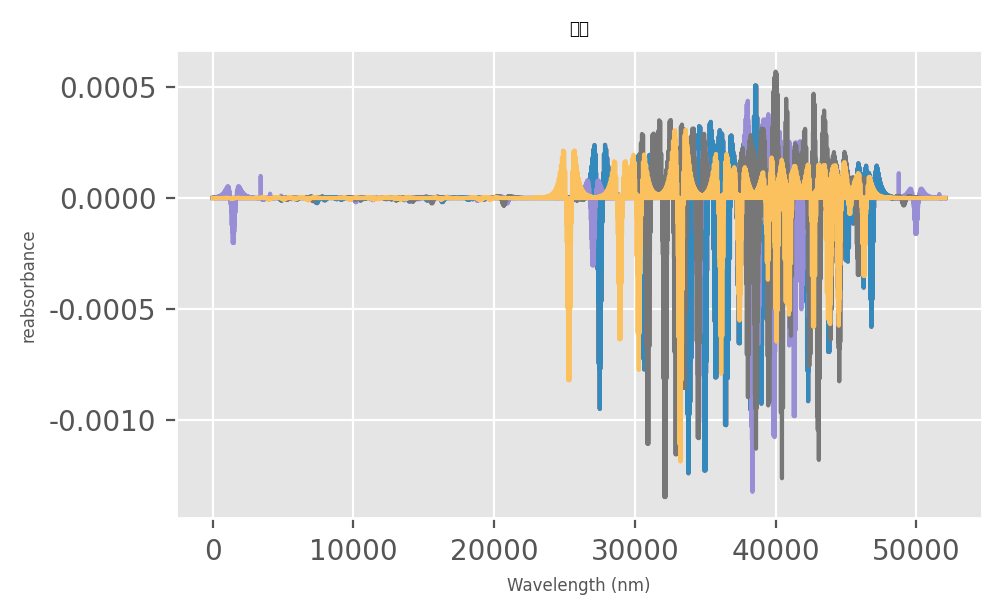

In [24]:
p.PlotSpectrum(uv_d2[:5], '演示', 0, 5).show()

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28436 (\N{CJK UNIFIED IDEOGRAPH-6F14}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


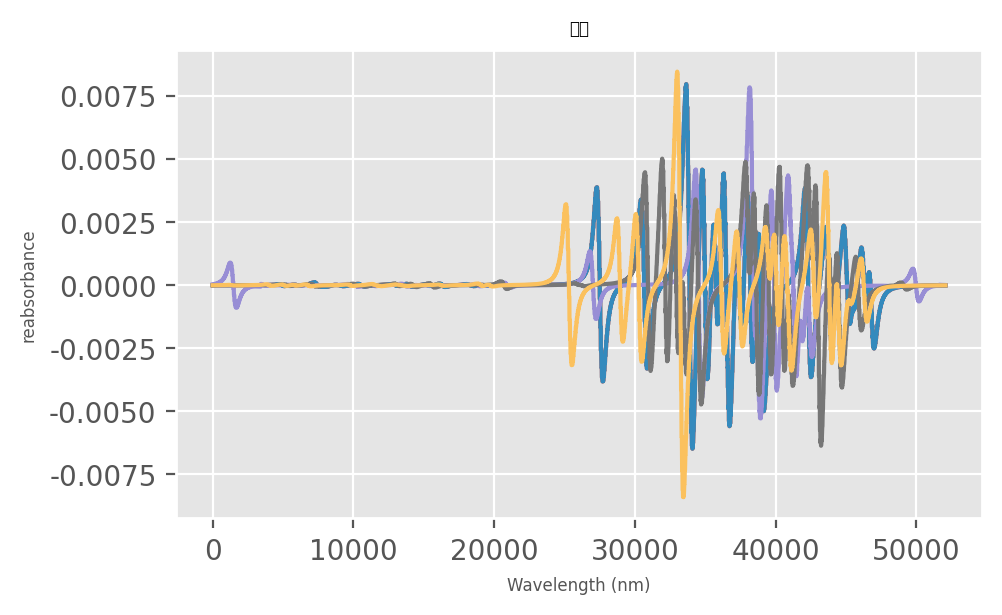

In [15]:
p.PlotSpectrum(uv_d1[:5], '演示', 0, 5).show()

In [ ]:
CD_Data=new_cd.reshape(9901,2,10417)
UV_Data=new_uv.reshape(9901,2,10417)
C_Data=ynei[:9901]
#data_seqx,data_seqy=create_data(C_Data,16)
print(CD_Data.shape)
print(UV_Data.shape)
print(np.append(CD_Data,UV_Data,axis=1).shape)
z=C_Data[:,302:603]
z[z>180]=360-z[z>180]

#CD_data = np.loadtxt('../data/01-10/S01/CD_DFT_results/001.001_sig-CD-DFT.txt')
C_data = C_Data[0]
print(C_data.shape)
raw_data=torch.from_numpy(C_data.reshape(906,))

In [19]:
#输入两种数据
x=torch.from_numpy(np.append(CD_Data,UV_Data,axis=1))
y=torch.from_numpy(C_Data)#直接输出坐标

torch_dataset = Data.TensorDataset(x, y)
#torch_dataset = Data.TensorDataset(x, x_dist)#输出距离

train_size = int(len(torch_dataset) * 0.6)
validate_size = int(len(torch_dataset) * 0.3)
test_size = len(torch_dataset) - validate_size - train_size

train_dataset, validate_dataset, test_dataset = torch.utils.data.random_split(torch_dataset, [train_size, validate_size, test_size],generator=torch.Generator().manual_seed(0))


train_loader = Data.DataLoader(
    dataset=train_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=16,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)

In [15]:
class Generator(nn.Module):

    def __init__(self):
        super(Generator, self).__init__()
        h_dim=512
        self.conf_net = nn.Sequential(
            
            nn.Linear(906, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, 512),
        )
        self.UV_net= nn.Sequential(
            nn.Conv2d(2,10,kernel_size=(500,2),padding=1),
            nn.BatchNorm2d(10),
            nn.ReLU(inplace=True),
            nn.Conv2d(10, 10, kernel_size=(500,2)),
            nn.BatchNorm2d(10),
            nn.Conv2d(10, 1, kernel_size=(500,2)),
            nn.BatchNorm2d(1),
            
        )
        self.rawspe_net = nn.Sequential(
            nn.Conv2d(2,10,kernel_size=(500,2),padding=1),
            nn.BatchNorm2d(10),
            nn.ReLU(inplace=True),
            nn.Conv2d(10, 10, kernel_size=(500,2)),
            nn.BatchNorm2d(10),
            nn.Conv2d(10, 1, kernel_size=(500,2)),
            nn.BatchNorm2d(1),
            
        )
        
        
        self.changedim = nn.Linear(8922,512)
        
        self.output1_net=nn.Sequential(
            nn.Linear(1024,912),#906是内坐标
            nn.ReLU(),
            nn.Linear(912,302),
        )
        self.output2_net=nn.Sequential(
            nn.Linear(1024,912),#906是内坐标
            nn.ReLU(),
            nn.Linear(912,301),
        )
        self.output3_net=nn.Sequential(
            nn.Linear(1024,912),#906是内坐标
            nn.ReLU(),
            nn.Linear(912,303),
        )


        

    def forward(self, z,raw_data,raw_spectrum):
        signs=self.UV_net(z).view(-1,8922)
        raw_signs = self.UV_net(raw_spectrum).view(-1,8922).repeat(signs.size()[0],1)
        
        #有构象
        output2 = self.changedim(signs-raw_signs)
        
        
        output1 = self.conf_net(raw_data).repeat(signs.size()[0],1)
        bf_out = torch.cat((output1,output2),1)

        angle_gap=self.output1_net(bf_out)
        dangle_gap=self.output2_net(bf_out)
        ordinate_gap=self.output3_net(bf_out)

        angle=angle_gap+raw_data.repeat(signs.size()[0],1)[:,:302]
        dangle=dangle_gap+raw_data.repeat(signs.size()[0],1)[:,302:603]
        ordinate=ordinate_gap+raw_data.repeat(signs.size()[0],1)[:,603:]
        #无构象
        #ordinate=self.out(signs)
        angle=torch.cat((angle,dangle),1)
        
        return torch.cat((angle,ordinate),1)


In [16]:
class Discriminator(nn.Module):

    def __init__(self):
        super(Discriminator, self).__init__()
        h_dim=256
        self.conf_net = nn.Sequential(
            nn.Linear(906, h_dim),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, h_dim),
            nn.ReLU(True),
            nn.Linear(h_dim, 256)

        )
        
        self.sign_net = nn.Sequential(
            nn.Conv2d(2,10,kernel_size=(500,2),padding=1),
            nn.BatchNorm2d(10),
            nn.ReLU(inplace=True),
            nn.Conv2d(10, 10, kernel_size=(500,2)),
            nn.BatchNorm2d(10),
            nn.Conv2d(10, 1, kernel_size=(500,2)),
            nn.BatchNorm2d(1),
            
        )
        self.changedim = nn.Linear(8922,256)
        self.output_net=nn.Sequential(
            nn.Linear(512,1),
            nn.Sigmoid()
        )

    def forward(self, sign, angle,bond):
        output1 = self.conf_net(torch.cat((angle,bond),1))
        output2 = self.sign_net(sign).view(-1,8922)
        output2 = self.changedim(output2)
        bf_out = torch.cat((output1,output2),1)
        out = self.output_net(bf_out)
        return out.view(-1)

In [67]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        # m.weight.data.normal_(0.0, 0.02)
        nn.init.kaiming_normal_(m.weight)
        m.bias.data.fill_(0)
        
def gradient_penalty(batchsz,D,sign, xr, xf):
    """
    :param D:
    :param xr:
    :param xf:
    :return:
    """
    LAMBDA = 0.3

    # only constrait for Discriminator
    xf = xf.detach()
    xr = xr.detach()

    # [b, 1] => [b, 2]
    alpha = torch.rand(batchsz, 1).cuda(2)
    alpha = alpha.expand_as(xr)

    interpolates = alpha * xr + ((1 - alpha) * xf)
    interpolates.requires_grad_()

    disc_interpolates = D(sign,interpolates)

    gradients = autograd.grad(outputs=disc_interpolates, inputs=interpolates,
                              grad_outputs=torch.ones_like(disc_interpolates),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]

    gp = ((gradients.norm(2, dim=1) - 1) ** 2).mean() * LAMBDA

    return gp

def coordinate_loss(x,y):

    
    #distances = torch.cdist(x_distances, y_distances, p=2)
    l1_loss_fn = torch.nn.L1Loss(reduce=False, size_average=True)
    return l1_loss_fn(x,y)

def dist_loss(x,y):
    l2_loss_fn = torch.nn.MSELoss(reduce=False, size_average=True)
    return l2_loss_fn(x,y)

In [ ]:
torch.manual_seed(22)
np.random.seed(22)

G = Generator().cuda(2)
D = Discriminator().cuda(2)
G.apply(weights_init)
D.apply(weights_init)

optim_G = optim.SGD(G.parameters(), lr=5e-4, momentum=0.9,weight_decay=0.01)
optim_D = optim.SGD(D.parameters(), lr=5e-4, momentum=0.9,weight_decay=0.01)

init_conformation = raw_data.to(torch.float32).cuda(2)
init_spectrum = raw_spectrum.to(torch.float32).cuda(2)

#viz.line([[0,0]], [0], win='loss', opts=dict(title='loss',legend=['D', 'G']))

for epoch in range(50):

    # 1. train discriminator for k steps
    for _ in range(3):
        #x = next(data_iter)
        for batch_x,y in train_loader:
            #print(batch_x.shape)
            coor = y.to(torch.float32).cuda(2)#内坐标
            angle=coor[:,:603]
            bond=coor[:,603:]
            z = batch_x.to(torch.float32).cuda(2)#光谱
            
            
            # [b,1]
            predr = D(z,angle,bond)
            # max log(lossr)
            lossr = - (predr.mean())

            # [b, 2]
            
            # stop gradient on G
            # [b, 41668]
            xconf = G(z,init_conformation,init_spectrum).detach()# stop gradient
            # [b]
            xangle=xconf[:,:603]
            xbond=xconf[:,603:]
            predf = (D(z,xangle,xbond))
            # min predf
            lossf = (predf.mean())
            #print(z.size()[0])
            # gradient penalty
            #gp = gradient_penalty(z.size()[0],D,z, xr, xf)
            
            
            loss_D = lossr + lossf 
            
            #   optimize
            optim_D.zero_grad()
            loss_D.backward()
            # for p in D.parameters():
            #     print(p.grad.norm())
            optim_D.step()


    # 2. train Generator
    for batch_x,batch_y in train_loader:
        
        z = batch_x.to(torch.float32).cuda(2)
        confinf = batch_y.to(torch.float32).cuda(2)
        angle=confinf[:,:302]
        dangle=confinf[:,302:603]
        bond=confinf[:,603:]

        xconf = G(z,init_conformation,init_spectrum)
        xangle=xconf[:,:302]
        xdangle=xconf[:,302:603]
        xbond=xconf[:,603:]
        
        predf = (D(z,torch.cat((xangle,xdangle),1),xbond))
        # max predf
        lossd=dist_loss(xbond,bond).mean()
        lossa=dist_loss(xangle,angle).mean()
        lossda=dist_loss(xdangle,dangle).mean()

        lossp=- (predf.mean())
        loss_G = lossp + lossd+lossa+3*lossda
        
        
        
        
        #optimize
        optim_G.zero_grad()
        loss_G.backward()
        optim_G.step()


    if epoch % 1 == 0:
        #viz.line([[loss_D.item(), loss_G.item()]], [epoch], win='loss', update='append')

        #generate_image(D, G, xr, epoch)
        
        print(epoch ,lossr.item(),lossf.item(),loss_D.item(),lossa.item(),lossd.item(),lossp.item(), lossda.item())


In [22]:
torch.manual_seed(22)
np.random.seed(22)

G = Generator().cuda(2)
D = Discriminator().cuda(2)
G.apply(weights_init)
D.apply(weights_init)

optim_G = optim.SGD(G.parameters(), lr=5e-4, momentum=0.9,weight_decay=0.01)
optim_D = optim.SGD(D.parameters(), lr=5e-4, momentum=0.9,weight_decay=0.01)

init_conformation = raw_data.to(torch.float32).cuda(2)
init_spectrum = raw_spectrum.to(torch.float32).cuda(2)

#viz.line([[0,0]], [0], win='loss', opts=dict(title='loss',legend=['D', 'G']))

for epoch in range(50):

    # 1. train discriminator for k steps
    for _ in range(3):
        #x = next(data_iter)
        for batch_x,y in train_loader:
            #print(batch_x.shape)
            coor = y.to(torch.float32).cuda(2)#内坐标
            angle=coor[:,:603]
            bond=coor[:,603:]
            z = batch_x.to(torch.float32).cuda(2)#光谱
            
            
            # [b,1]
            predr = D(z,angle,bond)
            # max log(lossr)
            lossr = - (predr.mean())

            # [b, 2]
            
            # stop gradient on G
            # [b, 41668]
            xconf = G(z,init_conformation,init_spectrum).detach()# stop gradient
            # [b]
            xangle=xconf[:,:603]
            xbond=xconf[:,603:]
            predf = (D(z,xangle,xbond))
            # min predf
            lossf = (predf.mean())
            #print(z.size()[0])
            # gradient penalty
            #gp = gradient_penalty(z.size()[0],D,z, xr, xf)
            
            
            loss_D = lossr + lossf 
            
            #   optimize
            optim_D.zero_grad()
            loss_D.backward()
            # for p in D.parameters():
            #     print(p.grad.norm())
            optim_D.step()


    # 2. train Generator
    for batch_x,batch_y in train_loader:
        
        z = batch_x.to(torch.float32).cuda(2)
        confinf = batch_y.to(torch.float32).cuda(2)
        angle=confinf[:,:302]
        dangle=confinf[:,302:603]
        bond=confinf[:,603:]

        xconf = G(z,init_conformation,init_spectrum)
        xangle=xconf[:,:302]
        xdangle=xconf[:,302:603]
        xbond=xconf[:,603:]
        
        predf = (D(z,torch.cat((xangle,xdangle),1),xbond))
        # max predf
        lossd=dist_loss(xbond,bond).mean()
        lossa=dist_loss(xangle,angle).mean()
        lossda=dist_loss(xdangle,dangle).mean()

        lossp=- (predf.mean())
        loss_G = lossp + lossd+lossa+3*lossda
        
        
        
        
        #optimize
        optim_G.zero_grad()
        loss_G.backward()
        optim_G.step()


    if epoch % 1 == 0:
        #viz.line([[loss_D.item(), loss_G.item()]], [epoch], win='loss', update='append')

        #generate_image(D, G, xr, epoch)
        
        print(epoch ,lossr.item(),lossf.item(),loss_D.item(),lossa.item(),lossd.item(),lossp.item(), lossda.item())


0 -1.0 1.0 0.0 2.6198039054870605 0.0025491053238511086 -1.0 63.56203842163086
1 -1.0 1.0 0.0 2.591958522796631 0.0013581430539488792 -1.0 63.55315399169922
2 -1.0 1.0 0.0 2.589125633239746 0.0005180244916118681 -1.0 63.64079284667969
3 -1.0 1.0 0.0 2.587270498275757 0.00045505157322622836 -1.0 63.80917739868164
4 -1.0 1.0 0.0 2.583994150161743 0.0004797427973244339 -1.0 63.84986114501953
5 -1.0 1.0 0.0 2.582571268081665 0.0004246862081345171 -1.0 63.861976623535156
6 -1.0 1.0 0.0 2.581860065460205 0.000417527393437922 -1.0 63.85703659057617
7 -1.0 1.0 0.0 2.580735445022583 0.00041459742351435125 -1.0 63.85505294799805
8 -1.0 1.0 0.0 2.5817651748657227 0.00042179133743047714 -1.0 63.85297393798828
9 -1.0 1.0 0.0 2.5822091102600098 0.0004107325221411884 -1.0 63.84926986694336
10 -1.0 1.0 0.0 2.5821168422698975 0.0004206751473248005 -1.0 63.84535598754883
11 -1.0 1.0 0.0 2.582364559173584 0.0004074561584275216 -1.0 63.844058990478516
12 -0.9999999403953552 1.0 5.960464477539063e-08 2.582

In [124]:
#测试集样本结果
test_loader = Data.DataLoader(
    dataset=test_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=500,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)

In [125]:
for test_x,test_y in test_loader:
    print(test_x.shape)
    test_x=test_x.to(torch.float32).cuda(2)
    test_y=test_y.to(torch.float32).cuda(2)
    tsangle=test_y[:,:302]
    tsdangle=test_y[:,302:603]
    tsbond=test_y[:,603:]
    txconf=G(test_x,init_conformation,init_spectrum)
        
    txangle=txconf[:,:302]
    txdangle=txconf[:,302:603]
    txbond=txconf[:,603:]
    lossa=l2_loss_fn(tsangle,txangle).mean()
    lossda=l2_loss_fn(tsdangle,txdangle).mean()
    lossd=l2_loss_fn(tsbond,txbond).mean()
    print(lossa.item(),lossd.item(), lossda.item())


torch.Size([500, 2, 10417, 2])
2.9859225749969482 0.01695631816983223 65.54999542236328
torch.Size([491, 2, 10417, 2])
2.9699292182922363 0.01698264852166176 65.97593688964844


In [18]:
#味限定随机种子划分数据的版本
torch.save(G, 'nei_model1.pkl') 

In [21]:
#限定随机种子划分数据的版本
torch.save(G, 'nei_model0.pkl') 

In [94]:
#加载预测数据

filePath = '../data/Liganddata'
def readname(filePath):
    name = os.listdir(filePath)
    return name

LigandCD_Data = np.loadtxt('../data/MDdata/325K/CD_DFT/md1_sig-CD-DFT.txt').reshape(1,10417,2)
LigandUV_Data = np.loadtxt('../data/MDdata/325K/UV_DFT/md1_sig-UV-DFT.txt').reshape(1,10417,2)

names = readname(filePath)
for i in range(2,101):
    tempCDData=np.loadtxt("../data/MDdata/325K/CD_DFT/md"+str(i)+"_sig-CD-DFT.txt").reshape(1,10417,2)
    tempUVData=np.loadtxt("../data/MDdata/325K/UV_DFT/md"+str(i)+"_sig-UV-DFT.txt").reshape(1,10417,2)
    LigandCD_Data=np.append(LigandCD_Data,tempCDData,axis=0)
    LigandUV_Data=np.append(LigandUV_Data,tempUVData,axis=0)

OSError: ../data/Hdata/CD_DFT/md1_sig-CD-DFT.txt not found.

In [90]:

Ligand_data = np.loadtxt('../data/MDdata/325K/all_gzmat.csv',delimiter=',',dtype=np.str)
Ligand_ydata = Ligand_data.astype(np.float)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [128]:
#氢键旋转的数据
H_data = np.loadtxt('../data/Hdata/all_gzmat.csv',delimiter=',',dtype=np.str)


/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [129]:
filetext=H_data[1:,0]

In [130]:
H_ydata=H_data[:,1:].astype(np.float)

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [131]:
LigandCD_Data = np.loadtxt('../data/Hdata/CD_DFT/001.051-h-1_sig-CD-DFT.txt').reshape(1,10417,2)
LigandUV_Data = np.loadtxt('../data/Hdata/UV_DFT/001.051-h-1_sig-UV-DFT.txt').reshape(1,10417,2)
for i in filetext:
    tempCDData=np.loadtxt("../data/Hdata/CD_DFT/"+str(i)+"_sig-CD-DFT.txt").reshape(1,10417,2)
    tempUVData=np.loadtxt("../data/Hdata/UV_DFT/"+str(i)+"_sig-UV-DFT.txt").reshape(1,10417,2)
    LigandCD_Data=np.append(LigandCD_Data,tempCDData,axis=0)
    LigandUV_Data=np.append(LigandUV_Data,tempUVData,axis=0)

In [132]:
Ligand_x=torch.from_numpy(np.append(LigandCD_Data.reshape(33,1,10417,2),LigandUV_Data.reshape(33,1,10417,2),axis=1)).to(torch.float32).cuda(2)
Ligand_y=torch.from_numpy(H_ydata).to(torch.float32).cuda(2)

In [91]:
Ligand_x=torch.from_numpy(np.append(LigandCD_Data.reshape(100,1,10417,2),LigandUV_Data.reshape(100,1,10417,2),axis=1)).to(torch.float32).cuda(2)
Ligand_y=torch.from_numpy(Ligand_ydata).to(torch.float32).cuda(2)

In [133]:

langle=Ligand_y[:,:302]
ldangle=Ligand_y[:,302:603]
lbond=Ligand_y[:,603:]

In [60]:
langle.shape

torch.Size([100, 302])

In [134]:
xlconf=G(Ligand_x,init_conformation,init_spectrum)
        
xlangle=xlconf[:,:302]
xldangle=xlconf[:,302:603]
xlbond=xlconf[:,603:]
lossa=l2_loss_fn(xlangle,langle).mean()
lossda=l2_loss_fn(xldangle,ldangle).mean()
lossd=l2_loss_fn(xlbond,lbond).mean()
print(lossa.item(),lossd.item(), lossda.item())


3.1882426738739014 0.0177611131221056 70.4577407836914


In [47]:

Ligandangle=Ligand_ydata[:,:302]
Liganddangle=Ligand_ydata[:,302:603]
Ligandbond=Ligand_ydata[:,603:]

In [138]:

xlconf_save = xlconf.cpu().detach().numpy()

In [139]:
np.savetxt("H_pre_conf.csv",xlconf_save,delimiter=',')

In [73]:
print(Ligandangle.std(),Ligandangle.mean(),Ligandangle.max(),Ligandangle.min())

8.028166273056739 112.31024569536423 173.52 20.99


In [81]:
print(Liganddangle.std(),Liganddangle.mean(),Liganddangle.max(),Liganddangle.min())

100.28680627578947 186.90652790697675 360.0 0.01


In [77]:
print(Ligandbond.std(),Ligandbond.mean(),Ligandbond.max(),Ligandbond.min())

0.5197002261099385 1.2717395280528052 9.9983 0.9593
